# Setup

In [27]:
!pip install pyproj==1.9.6
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [28]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
import networkx as nx

In [29]:
from netCDF4 import Dataset as NetCDFFile

# Different Layouts

Following cells will display different layout designs for plotting maps to be used in the project

## ETOPO

ETOPO1 is a 1 arc-minute global relief model of Earth's surface that integrates land topography and ocean bathymetry. Built from global and regional data sets, it is available in "Ice Surface" (top of Antarctic and Greenland ice sheets) and "Bedrock" (base of the ice sheets).

ETOPO1 Global Relief Model is used to calculate the Volumes of the World's Oceans and to derive a Hypsographic Curve of Earth's Surface.

https://ngdc.noaa.gov/mgg/global/


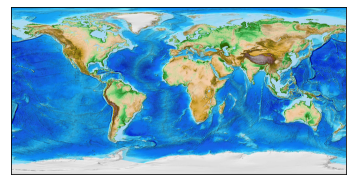

In [30]:
#The valid range of latitude in degrees is -90 and +90 for the southern and 
#northern hemisphere respectively. Longitude is in the range -180 and +180 
#specifying coordinates west and east of the Prime Meridian, respectively.


# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='f')
m.etopo()
plt.show()

## Blue Marble 

'Blue Marble' image is the most detailed true-color image of the entire Earth to date. Using a collection of satellite-based observations, scientists and visualizers stitched together months of observations of the land surface, oceans, sea ice, and clouds into a seamless, true-color mosaic of every square kilometer (0.386 square mile) of our planet. Much of the information contained in this image came from a single remote-sensing device-NASA's Moderate Resolution Imaging Spectroradiometer, or MODIS. Flying over 700 km above the Earth onboard the Terra satellite, MODIS provides an integrated tool for observing a variety of terrestrial, oceanic, and atmospheric features of the Earth. The land and coastal ocean portions of these images are based on surface observations collected from June through September 2001 and combined, or composited, every eight days to compensate for clouds that might block the sensor's view of the surface on any single day.

https://svs.gsfc.nasa.gov/2915

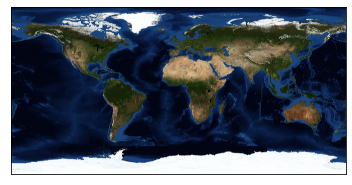

In [10]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='f') 

m.bluemarble(scale = 2.0)
plt.show()

## Shaded Relief

Creates a color 3D representation of the terrain by merging the images from the elevation-coded and hillshade methods.

https://pro.arcgis.com/en/pro-app/latest/arcpy/image-analyst/shadedrelief.htm

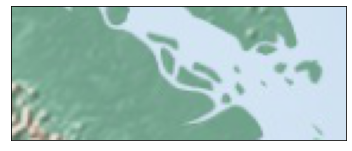

In [33]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(projection='merc',llcrnrlat=0,urcrnrlat=2,\
            llcrnrlon=100,urcrnrlon=105,lat_ts=20,resolution='f', area_thresh = None)
       
m.shadedrelief()
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-393737.7847679463,657258.1348543835,3687144.9407126387,3444921.729321942&bboxSR=3414&imageSR=3414&size=2500,1707&dpi=192&format=png32&transparent=true&f=image


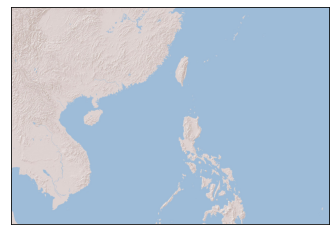

In [11]:
map = Basemap(lat_0=1.3, lon_0=103.8,
    area_thresh = 0.01, llcrnrlon=103.52,llcrnrlat=1.12,urcrnrlon=104.16,urcrnrlat=1.56,lat_ts=20,resolution='f', epsg=3414)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='World_Shaded_Relief', xpixels = 2500, dpi = 192, verbose= True)
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-393737.7847679463,657258.1348543835,3687144.9407126387,3444921.729321942&bboxSR=3414&imageSR=3414&size=2500,1707&dpi=192&format=png32&transparent=true&f=image


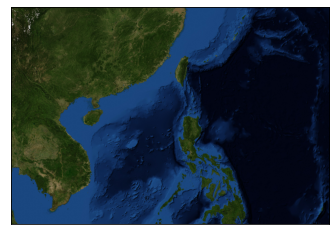

In [12]:
map = Basemap(lat_0=1.3, lon_0=103.8,
    area_thresh = 0.01, llcrnrlon=103.52,llcrnrlat=1.12,urcrnrlon=104.16,urcrnrlat=1.56,lat_ts=20,resolution='f', epsg=3414)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, dpi = 192, verbose= True)
plt.show()

## Polyconic Projection

The polyconic projection is also known as American polyconic or ordinary polyconic projection. The name translates into "many cones," and it is created by lining up an infinite number of cones along the central meridian. This affects the shape of the meridians. Unlike other conic projections, the meridians are curved rather than straight. The projection is neither conformal nor equal-area. It is appropriate for regions of predominant north-south extent.
The projection was developed by Ferdinand R. Hassler in 1820.

https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/polyconic.htm

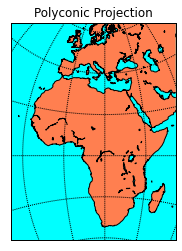

In [15]:
# setup polyconic basemap
# by specifying lat/lon corners and central point.
# area_thresh=1000 means don't plot coastline features less
# than 1000 km^2 in area.
m = Basemap(llcrnrlon=-35.,llcrnrlat=-30,urcrnrlon=80.,urcrnrlat=50.,\
            resolution='l',area_thresh=1000.,projection='poly',\
            lat_0=0.,lon_0=20.)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
plt.title("Polyconic Projection")
plt.show()

## Equidistant Cylindrical Projection

The simplest projection, just displays the world in latitude/longitude coordinates.



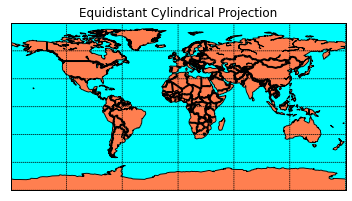

In [18]:
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines(linewidth = 0.9)
m.drawcountries( linewidth = 2.0)
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

## Mercator Projection

Mercator projection, type of map projection introduced in 1569 by Gerardus Mercator. It is often described as a cylindrical projection, but it must be derived mathematically. The meridians are equally spaced parallel vertical lines, and the parallels of latitude are parallel horizontal straight lines that are spaced farther and farther apart as their distance from the Equator increases. This projection is widely used for navigation charts, because any straight line on a Mercator projection map is a line of constant true bearing that enables a navigator to plot a straight-line course. It is less practical for world maps, however, because the scale is distorted; areas farther away from the Equator appear disproportionately large. On a Mercator projection, for example, the landmass of Greenland appears to be greater than that of the continent of South America; in actual area, Greenland is smaller than the Arabian Peninsula.

https://www.britannica.com/science/Mercator-projection

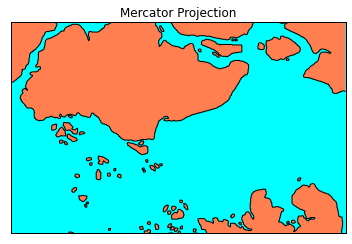

In [17]:
m = Basemap(projection='merc', lat_0=1.3, lon_0=103.8,
    area_thresh = 0.1, llcrnrlon=103.62,llcrnrlat=1.12,urcrnrlon=104.16,urcrnrlat=1.46,lat_ts=20,resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

## Miller Projection

The Miller cylindrical projection is a compromise cylindrical map projection. The projection is a modification of the Mercator projection thus they are almost identical near the equator. Although the Miller projection does not project poles to infinity, distortion is still severe at the poles.
The Miller cylindrical projection was developed by Osborn M. Miller in 1942.

https://desktop.arcgis.com/en/arcmap/latest/map/projections/miller-cylindrical.htm

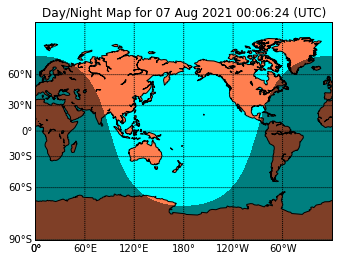

In [19]:
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

## Orthographic Projection 

The orthographic projection is an azimuthal perspective projection, projecting the Earth's surface from an infinite distance to a plane. It gives the illusion of a three-dimensional globe so it is often used as inset map or for pictorial views of the Earth from space. This map projection is the same as the local projection but only supports spheres.
It is believed that the projection was developed by the Egyptians and the Greeks.

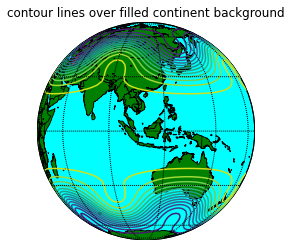

In [22]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=0,lon_0=110,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.9)
map.drawcountries(linewidth=0.8)
map.fillcontinents(color='green',lake_color='red')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

# Beyond Basic Projections

This portion of the code makes a simple graph with 2 cities as its vertices and the edge between them is the path between them. NetworkX has been used to implement the graph portion of the code.

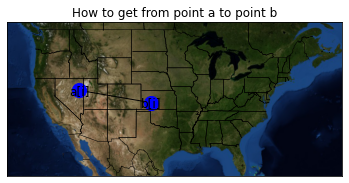

In [20]:
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

# position in decimal lat/lon
lats=[37.96,42.82,40, 38]
lons=[-121.29,-73.95, -115, -100]
# convert lat and lon to map projection
mx,my=m(lons,lats)
list = [0,1,2]
# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
for i in list:
	G.add_edge('a[i]','b[i]')
	pos={}
	pos['a[i]']=(mx[i],my[i])
	pos['b[i]']=(mx[i+1],my[i+1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()


This part of the code implements different locations in Singapore on the map. This cell serves as a major template for our project to work with different places (vertices) in Singapore and visualise the graph created by them. 

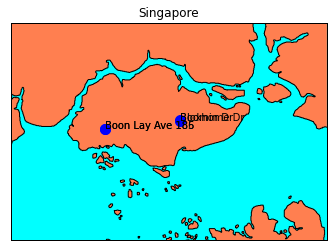

In [21]:
m = Basemap(projection='merc', lat_0=1.3, lon_0=103.8,
    area_thresh = 0.01, llcrnrlon=103.52,llcrnrlat=1.12,urcrnrlon=104.16,urcrnrlat=1.56,lat_ts=20,resolution='f')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
lons = [103.8622665,103.8625839, 103.7110071, 103.7107688]
lats = [1.3620015, 1.362462, 1.3462034, 1.3455589]
labels = [ 'Bodmin Dr', 'Bloxhome Dr', 'Boon Lay Ave 185', 'Boon Lay Ave 186'   ]
x,y = m(lons, lats)
m.plot(x,y,'bo',markersize = 10)
for label, xpt, ypt in zip(labels, x,y):
	plt.text(xpt, ypt, label)
plt.title("Singapore")
plt.show()